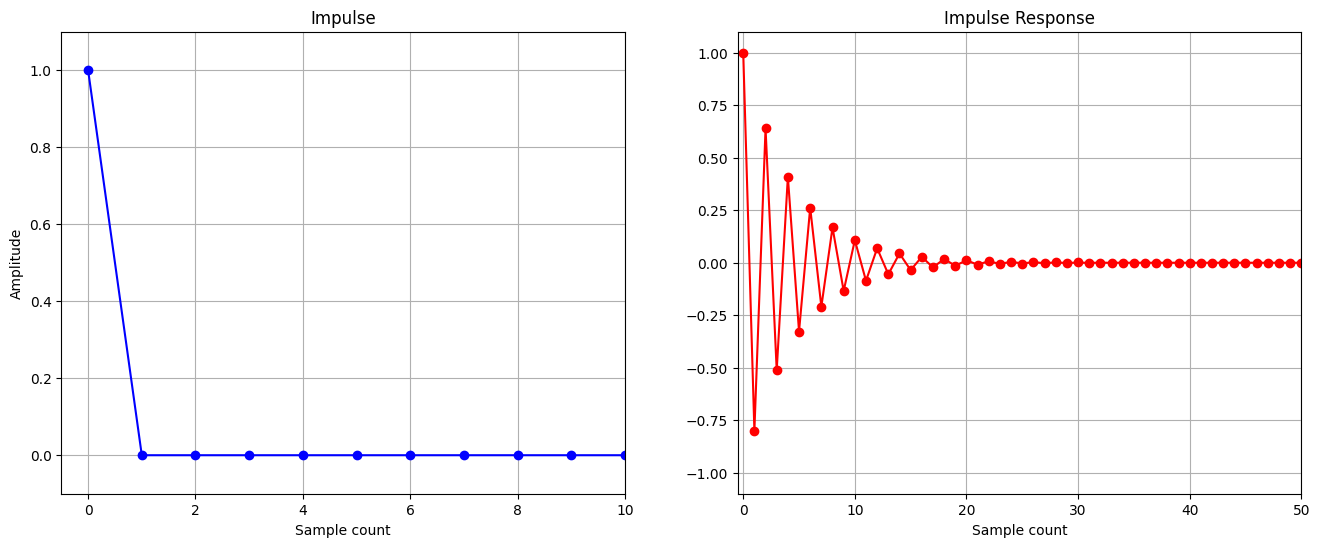

interactive(children=(FloatSlider(value=0.8, description='b1', max=1.0, min=-1.0, step=0.01), Output()), _dom_…

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

frameSize = 2048

def feedbackFilter(x, a0, b1):
    y = np.zeros(x.size)
    for n in range(0, x.size):
        y[n] = a0 * x[n] - b1 * y[n-1]
    return y


impulse = np.zeros(frameSize)
impulse[0] = 1;

@widgets.interact(b1=widgets.FloatSlider(min=-1.0, max=1.0, step=0.01, value=0.8))
def execute(b1=0.8):
    impulseResponse = feedbackFilter(impulse, 1.0, b1)
    
    fig, axes = plt.subplots(1, 2, figsize=(16,6))
    ax = axes[0]
    ax.plot(impulse, 'bo-')
    ax.set_xlabel('Sample count')
    ax.set_ylabel('Amplitude')
    ax.set_ylim(-0.1, 1.1)
    ax.set_xlim(-0.5, 10)
    ax.set_title("Impulse")
    ax.grid(which='both', axis='both')
    
    ax = axes[1]
    ax.plot(impulseResponse, 'ro-')
    ax.set_xlabel('Sample count')
    ax.set_ylim(-1.1, 1.1)
    ax.set_xlim(-0.5, 50)
    ax.set_title("Impulse Response")
    ax.grid(which='both', axis='both')

    plt.show


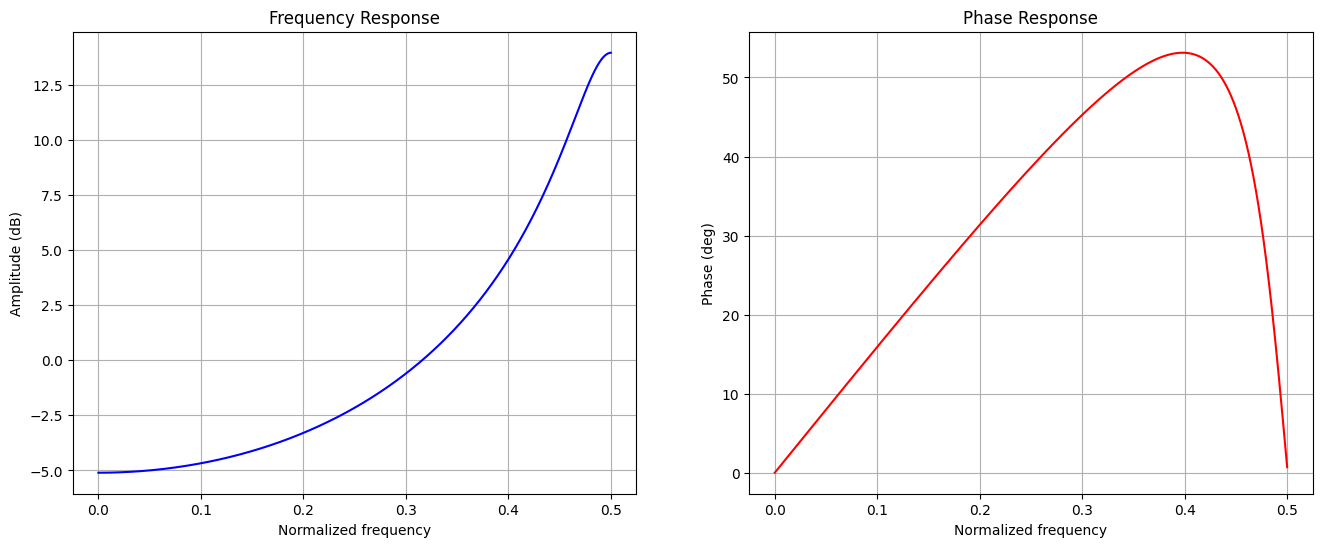

interactive(children=(FloatSlider(value=0.8, description='b1', max=1.0, min=-1.0, step=0.001), Output()), _dom…

In [5]:
from scipy.fftpack import fft

sampleRate = 44100

@widgets.interact(b1=widgets.FloatSlider(min=-1.0, max=1.0, step=0.001, value=0.8))
def execute(b1=0.8):
    spectrum = fft(feedbackFilter(impulse, 1.0, b1))    
    x = np.linspace(0, 0.5, spectrum.size//2)
    
    fig, axes = plt.subplots(1, 2, figsize=(16,6))
    ax = axes[0]
    with np.errstate(divide='ignore'):
        y = (20 * np.log10(np.abs(spectrum)))[:spectrum.size//2]
    ax.plot(x, y, 'b')
    #ax.set_xscale('log')
    ax.set_xlabel('Normalized frequency')
    ax.set_ylabel('Amplitude (dB)')
    ax.set_title("Frequency Response")
    ax.grid(which='both', axis='both')
    
    ax = axes[1]
    y = np.degrees(np.angle(spectrum))[:spectrum.size//2]
    ax.plot(x, y, 'r')
    #ax.set_xscale('log')
    ax.set_xlabel('Normalized frequency')
    ax.set_ylabel('Phase (deg)')
    ax.set_title("Phase Response")
    ax.grid(which='both', axis='both')
    
    plt.show()
    